In [60]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.linalg as linalg
import matplotlib.pyplot as plt
from math import log10

In [61]:
# Cepheids data

m = np.array([21.54, 20.45, 21.25, 20.35, 22.37, 21.35, 22.09, 20.36, 20.98, 22.17, 20.17, 22.30, 20.34, 20.33, 21.18, 22.54])
p = np.array([13.14, 25.30, 15.62, 26.98, 7.97, 14.78, 9.41, 26.79, 18.39, 8.96, 30.08, 8.27, 27.14, 27.32, 16.29, 7.17])
delta_m = np.array([0.12, 0.17, 0.13, 0.18, 0.1, 0.13, 0.11, 0.18, 0.14, 0.11, 0.19, 0.11, 0.18, 0.18, 0.14, 0.16])

Absolute magnitde based on apparent magnitude and distance(pc):

$M = m - 5log(\frac{d}{10})$

In [62]:
d_ly = 2.4e6
d = d_ly / 3.26 # distance in parsecs
M = m - 5 * np.log10(d/10)
print(M)

[-2.79496821 -3.88496821 -3.08496821 -3.98496821 -1.96496821 -2.98496821
 -2.24496821 -3.97496821 -3.35496821 -2.16496821 -4.16496821 -2.03496821
 -3.99496821 -4.00496821 -3.15496821 -1.79496821]


In [63]:
# Fitting a linear equation to log_p, M with errors

def cepheids_fit(x, a, b):
    return a*np.log10(x)+b
p_sorted = np.sort(p)
log_p = np.log10(p)
log_p_sorted = np.log10(p_sorted)
parameters, covariance = curve_fit(cepheids_fit, p, M, sigma=1/delta_m**2)
print(parameters)
errors = np.sqrt(np.diag(covariance))
print(errors)

[-3.80620603  1.46075462]
[0.00337209 0.00451799]


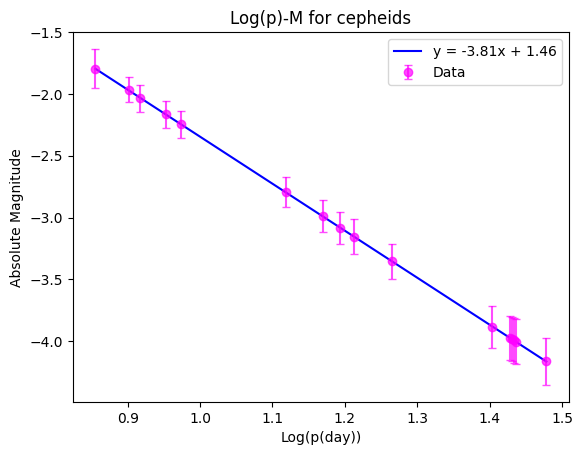

In [64]:
ax = plt.axes()
plt.plot(log_p_sorted, cepheids_fit(p_sorted, parameters[0], parameters[1]), label='y = {:.2f}x + {:.2f}'.format(parameters[0], parameters[1]), color='blue')
plt.errorbar(log_p, M, yerr=delta_m, label='Data',color='magenta', alpha=.7, fmt='o', capsize=3)
plt.legend()
plt.xlabel('Log(p(day))')
plt.ylabel('Absolute Magnitude')
plt.title('Log(p)-M for cepheids')
plt.show()

In [65]:
# Hubble's data

m2 = np.array([25.2, 24.8, 25.6, 24.9, 25.5, 24.5, 24.1, 25.1, 25.1, 24.8])
delta_m2 = np.array([0.2, 0.2, 0.1, 0.1, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1])
p2 = np.array([39.5, 38.7, 35.8, 41.7, 30.2, 39.2, 42.9, 41.4, 32.5, 42.1])
v2 = np.array([547, 468, 625, 492, 510, 385, 343, 557, 454, 482])
delta_v2 = np.array([6, 12, 4, 13, 18, 14, 13, 3, 6, 3])

$M_v = alog(P[days]) + B$

In [66]:
M2 = parameters[0]*np.log10(p2)+parameters[1]
print(M2)

[-4.61622287 -4.58240042 -4.45364432 -4.705817   -4.17245673 -4.60362041
 -4.75271416 -4.69388182 -4.29378494 -4.72159768]


In [67]:
d2 = 10 * np.power(10, (m2-M2)/5) * 1e-6
print(d2)

[ 9.18849903  7.52454225 10.25011798  8.33994909  8.59985929  6.61795915
  5.89580122  9.09444843  7.56409523  8.02268123]


In [68]:
# Hubble equation fitting

def hubble_fit(r, H):
    return H*r

d2_sorted = np.sort(d2)
H, H_covariance = curve_fit(hubble_fit, d2, v2, sigma=delta_v2)
H0 = H[0]
print(H0)
H0_error = np.sqrt(H_covariance)
print(H0_error)

60.59578031434904
[[0.24168633]]


In [69]:
log_p2 = np.log10(p2)
delta_M2 = np.sqrt((log_p2 ** 2) * (errors[0] ** 2) + (errors[1] ** 2))
delta_d2 = (d2 * np.log(10) / 5) * np.sqrt(delta_m2**2 + delta_M2**2)

In [70]:
delta_d2

array([0.84681444, 0.69346097, 0.4731638 , 0.38503279, 0.39693455,
       0.60991191, 0.2721993 , 0.83815452, 0.69708291, 0.37038821])

(1, 10)


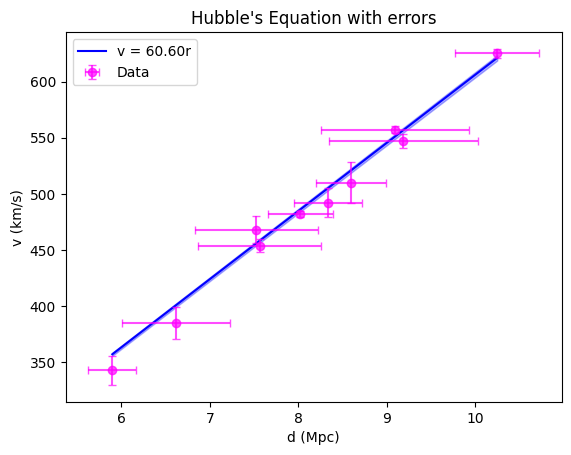

In [71]:
# Plotting our fit and data
print(hubble_fit(d2_sorted, H[0]+H0_error).shape)
ax = plt.axes()
# Plotting fit
plt.plot(d2_sorted, hubble_fit(d2_sorted, H[0]), label='v = {:.2f}r'.format(H0), color='blue')
# Plotting data
plt.errorbar(d2, v2, xerr=delta_d2, yerr=delta_v2, label='Data', color='magenta', alpha=.7, fmt='o', capsize=3)
# Plotting fit's error area
# idk why the area of error is so small here.
plt.fill_between(d2_sorted, hubble_fit(d2_sorted, (H[0]-H0_error)[0]), hubble_fit(d2_sorted, (H[0]+H0_error)[0]), color='blue', alpha=0.3)
plt.legend()
plt.xlabel('d (Mpc)')
plt.ylabel('v (km/s)')
plt.title("Hubble's Equation with errors")
plt.show()